In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import copy
import os 
import scipy

import sys; sys.path.append("./scripts/")
from utils_ import load_data

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


def sns_styleset():
    sns.set_context('paper')
    sns.set_style('ticks')
    matplotlib.rcParams['axes.linewidth']    = .75
    matplotlib.rcParams['xtick.major.width'] = .75
    matplotlib.rcParams['ytick.major.width'] = .75
    matplotlib.rcParams['xtick.major.size'] = 3
    matplotlib.rcParams['ytick.major.size'] = 3
    matplotlib.rcParams['font.size']       = 7
    matplotlib.rcParams['axes.titlesize']  = 7
    matplotlib.rcParams['axes.labelsize']  = 7
    matplotlib.rcParams['legend.fontsize'] = 7
    matplotlib.rcParams['xtick.labelsize'] = 7
    matplotlib.rcParams['ytick.labelsize'] = 7
    
sns_styleset()

In [2]:
restriction_v1 = ["MC","BC", "SC", "DBC", "BPC", "HEC", "NFG"]

In [3]:
morph = pd.read_csv('./data/morphometric_statistic_full.csv')

morph = morph[morph['type'] != 'SOM L4 S1']
morph.loc[morph['type'] == 'NFC','type'] = 'NGC'

morph = morph[['type','name','branch_points', 'depth', 'height', 'max_branch_angle', 'max_branch_order', 'max_path_angle',
                           'max_path_dist_to_soma', 'max_segment_length', 'max_tortuosity', 'mean_branch_angle',
                           'mean_path_angle', 'mean_tortuosity',
                           'stems', 'tips', 'total_length', 'width']]

y = morph['type'].values

In [4]:
for column in morph.columns:
    morph = morph.rename(columns={column : column.replace("_", " ").capitalize()})

morph = morph.rename(columns={"Max path dist to soma": "Max neurite length"})

for column in morph.columns:
    if column in ['Depth', 'Height','Max neurite length','Max segment length', 'Total length', 'Width']:
        morph = morph.rename(columns={column : column + ' (μm)'})
    if column in ['Max branch angle','Mean branch angle','Max path angle', 'Mean path angle']:
        morph = morph.rename(columns={column : column + ' (°)'})

In [5]:
morph

,Type,Name,Branch points,Depth (μm),Height (μm),Max branch angle (°),Max branch order,Max path angle (°),Max neurite length (μm),Max segment length (μm),Max tortuosity,Mean branch angle (°),Mean path angle (°),Mean tortuosity,Stems,Tips,Total length (μm),Width (μm)
0,BPC,BPC_2017 10 02 slice 4 cell 2 rotated.swc,14,74.06,586.18,170.828099,6,173.563212,399.078308,228.608970,1.542145,65.173642,26.950502,1.204615,8,22,3245.888687,235.56
1,SC,SC_2017 16 06 slice 1 cell 2 rotated.swc,138,84.45,225.19,178.638796,19,177.590205,644.789023,98.110641,9.312774,82.495937,33.855936,1.667235,10,150,10560.327419,391.99
2,MC,MC_2015 04 07 slice 2 cell 7.swc,121,67.03,482.75,177.474273,20,180.000000,816.811115,203.482171,11.030754,85.976383,28.632790,1.532031,23,146,16727.157634,480.82
3,BC,BC_2017 16 10 slice 3 cell 2 rotated.swc,149,161.35,673.24,163.932368,18,180.000000,1073.576557,464.759563,6.763581,74.130038,26.552061,1.438060,8,163,23954.475723,653.32
4,DBC,DBC_2017 04 07 slice 2 cell 6 rotated.swc,102,103.03,719.18,155.106716,12,169.872831,699.552172,242.468021,2.525488,66.941779,27.024176,1.290217,12,119,15664.405492,333.32
5,DBC,DBC_2017 25 09 slice 2 cell 7 rotated.swc,149,91.03,510.11,162.906289,17,176.162852,675.909891,228.772209,3.027276,69.630506,30.892128,1.386699,8,163,16329.866056,319.16
6,HEC,HEC_2017 03 07 slice 1 cell 7 rotated.swc,80,91.83,230.20,158.751832,14,176.216175,596.577122,190.162397,5.167778,71.384035,29.171939,1.430511,8,89,8791.561964,425.13
7,HEC,HEC_2017 30 01 slice 2 cell 7 rotated.swc,66,123.24,223.97,173.359569,11,179.816780,715.304945,216.087032,5.857040,72.393200,26.887554,1.494099,8,85,13934.417226,561.59
8,SC,SC_2016 09 06 slice C cell 7 rotated.swc,248,100.00,491.31,167.992752,25,178.631238,1054.765950,265.961399,3.255407,75.274823,33.603847,1.478645,14,288,29795.688080,585.18
9,SC,SC_2017 12 09 slice 1 cell 7 rotated.swc,74,63.03,273.54,172.390480,15,179.443748,488.006453,195.039756,2.977551,77.377195,26.913253,1.277874,10,88,7731.081259,353.14


<IPython.core.display.Javascript object>


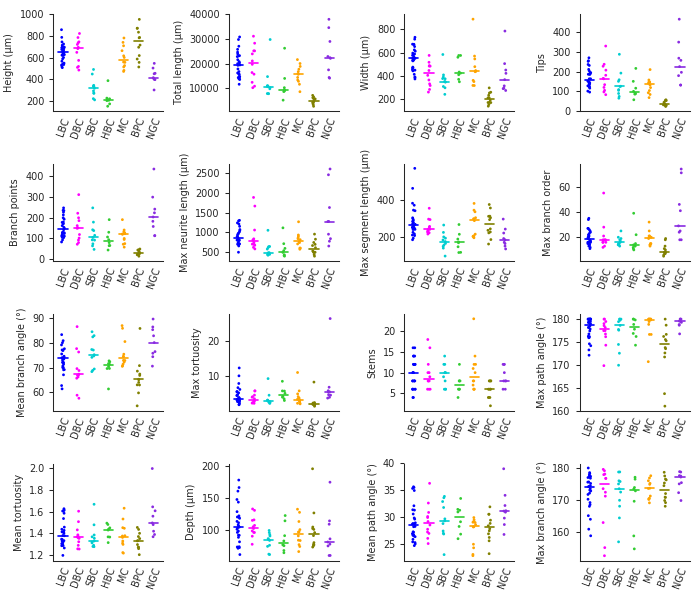

In [6]:
y[y=='BC'] = 'LBC'
y[y=='SC'] = 'SBC'
y[y=='HEC'] = 'HBC'
morph.loc[morph['Type']=='BC', 'Type'] = 'LBC'
morph.loc[morph['Type']=='SC', 'Type'] = 'SBC'
morph.loc[morph['Type']=='HEC', 'Type'] = 'HBC'

X = morph.values[:,2:].astype(float)

fig, axes = plt.subplots(4, 4, figsize = (7, 6))

order = ['LBC', 'DBC', 'SBC', 'HBC', 'MC', 'BPC', 'NGC']
colors = {'BPC':'#808000', 'MC':'#fea400', 'DBC':'#fe00fe', 'HBC':'#32cc32',
          'SBC':'#00cdd0', 'PYR':'#000000', 'LBC':'#0000fe', 'NGC':'#892be1'}

KW = []
for f in range(X.shape[1]):
    KW.append(scipy.stats.kruskal(X[y=='DBC',f], X[y=='HBC',f], X[y=='SBC',f],
                    X[y=='LBC',f], X[y=='MC',f], X[y=='BPC',f], X[y=='NGC',f]).statistic)
featureorder = np.argsort(KW)[::-1]

for feature, axis in zip(morph.columns[2:][featureorder], axes.reshape(-1)):
    sns.stripplot(x = 'Type', y = feature, data = morph, palette = colors,
                  jitter = True, ax = axis, s = 2, order = order, zorder=0)
    axis.set_xlabel('')
    axis.tick_params(axis='x', which='both', length=0, rotation = 70)
    
    for i, celltype in enumerate(order):
        m = np.median(morph[feature][y==celltype])
        axis.plot([i-.3,i+.3], [m,m], 'k', zorder=1, color=colors[celltype])

sns.despine()
plt.tight_layout()

plt.savefig('../figures/morphometrics.png', dpi=200)
plt.savefig('../figures/morphometrics.pdf', dpi=200)